# Funciones multivariable

# 1
Funciones lineales multivariable: un hiperplano definido en un espacio Rn+1 se puede expresar como una función con dominio x ∈ Rn y codominio en R como sigue: z = f (x) = x·w, con w ∈ Rn el arreglo de coeficientes de tal funcional.

## a
Tómese w 1 = 0,2 para la función f1 y w 2 = 0,05 para la función
f2, (funciones con dominio en R2 y codominio en R). Grafique ambos planos en Pytorch.

In [40]:
import torch
import matplotlib.pyplot as plt  # This is python's popular plotting library.
import matplotlib.animation as animation
import numpy as np


def hyperplane_3d(w: torch.tensor):
  # create a linear space of 0.1 to cover the plor space for x and y
  x = torch.linspace(-100, 100,10000)
  y = x
  x_y = torch.stack((x,y), dim=1)
  w_t = w.reshape(1,-1)
  z = torch.matmul(w_t, x_y.t())
  return [x_y, z]

def plot_hyperplane(plane, name):
  def rotate(angle):
    ax.view_init(azim=angle)
  xs, ys = torch.meshgrid(plane[0][:, 0], plane[0][:,1], indexing='xy')
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(xs, ys, plane[1], alpha=0.6, cmap='viridis')
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  ax.view_init(elev=20, azim=10)
  print("Making animation")
  rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
  rot_animation.save(f'{name}.gif', dpi=80, writer='imagemagick')


### Plano F1 (w1)
Los planos son gifs

Making animation


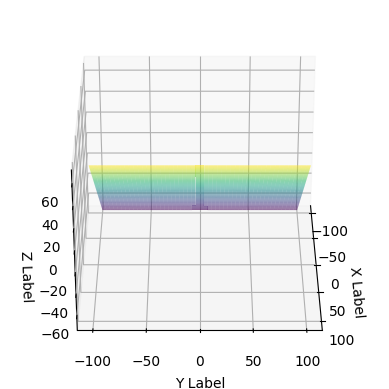

In [41]:
#Plano normal a w1
w = torch.tensor((0.5, 0.2))
result_w1 = hyperplane_3d(w)
plot_hyperplane(result_w1, "w1")

### Plano F2 (w2)
Los planos son gifs

Making animation


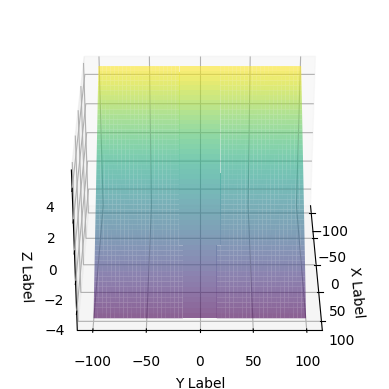

In [42]:
#Plano normal a w2
w = torch.tensor((-0.1, 0.05))
result_w2 = hyperplane_3d(w)
plot_hyperplane(result_w2, "w2")

# 2
Para cada plano, grafique el vector normal en el punto P = (1, 1) y una curva de nivel perpendicular a tal vector normal.


In [43]:
def plot_hyperplane_w_normal(plane, point,  normal, name):
  def rotate(angle):
    ax.view_init(azim=angle)
  xs, ys = torch.meshgrid(plane[0][:, 0], plane[0][:,1], indexing='xy')
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(xs, ys, plane[1], alpha=0.6, cmap='viridis')
  ax.quiver(point[0],point[1], point[2], normal[0]+point[0], normal[1]+point[1], normal[2]+point[2], length=2, pivot="tail")
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  ax.view_init(elev=0, azim=80)
  plt.show()



In [44]:
def plane_level(a, b, z_level):
    # We plot the line over a range of x values
    x_values = torch.linspace(-10, 10, 400)  # Adjust the range as needed
    y_values = -(a*x_values + z_level) / b

    # Plotting the level curve
    plt.plot(x_values.numpy(), y_values.numpy(), color='b', linestyle='-')
    plt.title(f'Level Curve at z = {z_level}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


### F1 (w1)
El vector normal que define la recta es <0.5, 0.2, 1>, esto se puede ver al realizar el producto punto con un punto en la recta este da cero

In [45]:
normal = torch.tensor((-0.5, -0.2, 1))
# Punto del plano en 1,1
w1_point = torch.tensor((1,1, 0.7))

print(f"El producto punto es {torch.dot(normal, w1_point)}")

El producto punto es 0.0


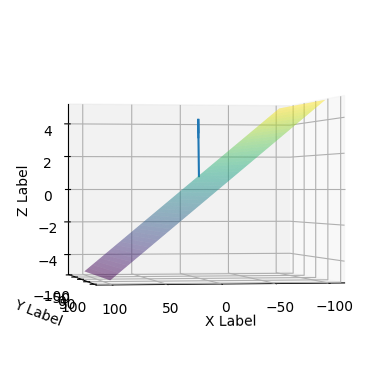

In [46]:
plot_hyperplane_w_normal(result_w2, torch.tensor((1,1, 0.7)), torch.tensor((-0.5, -0.2, 1)), "plotvector")

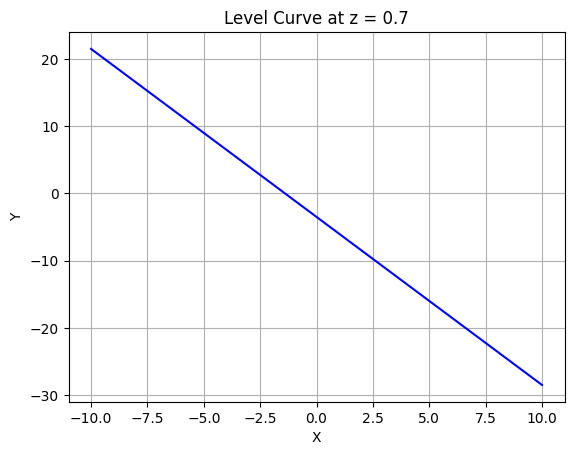

In [47]:
plane_level(0.5, 0.2, 0.7)

### F2 (w2)
El vector normal que define la recta es <0.1, -0.05, 1>, esto se puede ver al realizar el producto punto con un punto en la recta este da cero

In [48]:
normal = torch.tensor((0.1, -0.05, 1))
# Punto del plano en 1,1
w2_point = torch.tensor((1,1, -0.05))

print(f"El producto punto es {torch.dot(normal, w2_point)}")

El producto punto es 0.0


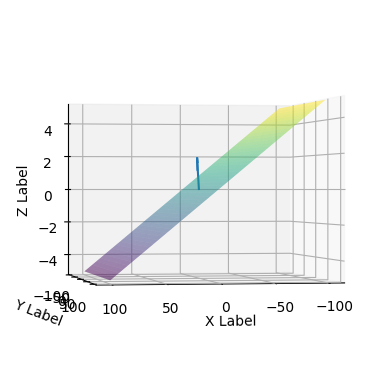

In [49]:
plot_hyperplane_w_normal(result_w2, torch.tensor((1,1, -0.05)), torch.tensor((0.1, -0.05, 1)), "plotvector")

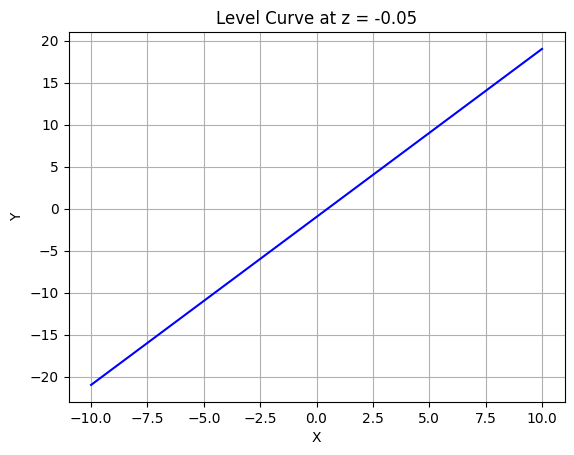

In [50]:
plane_level(0.1, -0.05, -0.05)

# 2
Para cada una de las siguientes funcio- nes multivariable: (1) grafique su superficie con dominio entre -10 y 10 (2) calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie) y (3) calcule la magnitud de tal vec- tor gradiente en cada punto (4) Calcule lo que se conoce como la matriz Hessiana.

In [58]:
def plot_surface(function, range):
    x_lineal = torch.linspace(range[0], range[1], 100)
    y_lineal = torch.linspace(range[0], range[1], 100)
    x, y = torch.meshgrid(x_lineal, y_lineal)
    z = function(x, y)
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    # Add a color bar which maps values to colors
    fig.colorbar(surf)

    # Label the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()
def plot_surface_vectors(function, range, p0, p1):
    #normalize vector

    vector_grad = p1 - p0
    vector_grad = vector_grad / torch.norm(vector_grad)
    print(vector_grad)

    #if p0.all():
    #    p0 = torch.nn.functional.normalize(p0, p=2, dim=0)

    x_lineal = torch.linspace(range[0], range[1], 100)
    y_lineal = torch.linspace(range[0], range[1], 100)
    x, y = torch.meshgrid(x_lineal, y_lineal)
    z = function(x, y)
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    # Plot the surface
    ax.quiver(0,0,0, vector_grad[0], vector_grad[1],vector_grad[2], color='red', label='Vector Gradiente', length=1)


    # Label the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')



    # Show the plot
    plt.show()

def plot_surface_vectors_2(function, range, p0, p1):
    #normalize vector

    vector_grad = p1 - p0
    vector_grad = vector_grad / torch.norm(vector_grad)
    print(vector_grad)

    #if p0.all():
    #    p0 = torch.nn.functional.normalize(p0, p=2, dim=0)

    x_lineal = torch.linspace(range[0], range[1], 100)
    y_lineal = torch.linspace(range[0], range[1], 100)
    x, y = torch.meshgrid(x_lineal, y_lineal)
    z = function(x, y)
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0,0,0, vector_grad[0], vector_grad[1],0, color='red', label='Vector Gradiente', length=1)
    # Plot the surface
    surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    # Label the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=70)

    # Show the plot
    plt.show()
def plot_surface_vectors_3(function, range, p0, p1):
    #normalize vector

    vector_grad = p1 - p0

    vector_grad = vector_grad / torch.norm(vector_grad)
    print(vector_grad)

    #if p0.all():
    #    p0 = torch.nn.functional.normalize(p0, p=2, dim=0)

    x_lineal = torch.linspace(range[0], range[1], 100)
    y_lineal = torch.linspace(range[0], range[1], 100)
    x, y = torch.meshgrid(x_lineal, y_lineal)
    z = function(x, y)
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0,0,0, vector_grad[0], vector_grad[1],0, color='red', label='Vector Gradiente', length=1,zorder=2)
    # Plot the surface
    surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none',zorder=1)

    # Label the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=20)

    # Show the plot
    plt.show()

def f1(x, y):
    return (x**3)*(y**2) + 1
def f2(x, y):
    return np.sin(x**2) + x*np.cos(y**3)
def f3(x, y):
    return 3**(2*x) + 5**(4*y) + 2*x + y*4



### (1) grafique su superficie con dominio entre -10 y 10[link text](https://)

#### Funcion a

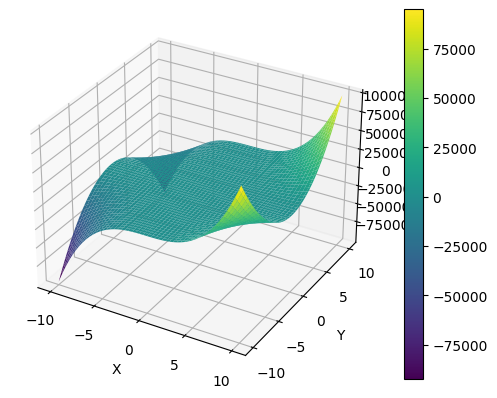

In [52]:
plot_surface(f1, [-10, 10])


#### Funcion b

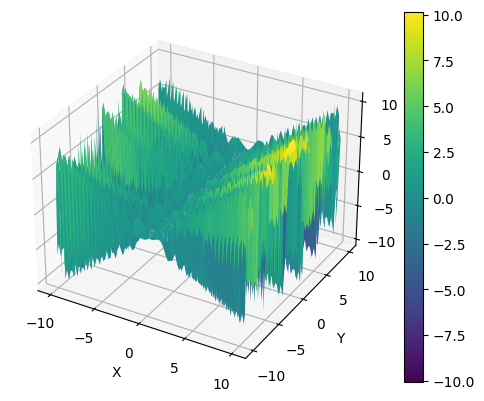

In [53]:
plot_surface(f2, [-10, 10])


#### Funcion c

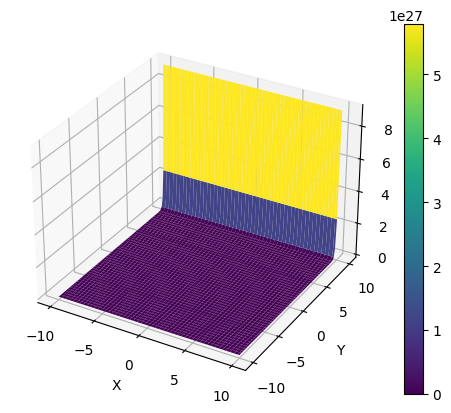

In [54]:
plot_surface(f3, [-10, 10])

In [55]:
def f(x,y):
  return 2*x*np.cos(x**2) - np.sin(y**3)
def f2(x,y):
  return -3*x*(y**2)*np.cos(y**3)

def f3(x, y):
  return 2*np.log(3)*9**x+2

def f4(x, y):
  return 4*(y**3)+4*np.log(5)*625**y

#f2(1.5, -5.5)
#f2(-10, -10)
#f(-10, -10)
f3(-4,-2)
f4(-4,-2)

f3(-2,9)
f4(-2,9)

9.368161626824296e+25

### (2) calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie)

#### Funcion *a*

tensor([ 9.0227e-16, -7.0654e-16,  1.0000e+00])


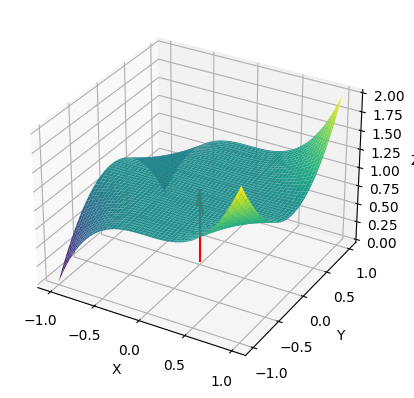

In [56]:
plot_surface_vectors(f1, [-1, 1], torch.tensor((0,0,0)), torch.tensor((6520.2732,  -5105.8224, f1(6520.2732,  -5105.8224))))


#### Funcion *b*

tensor([-0.0094,  1.0000])


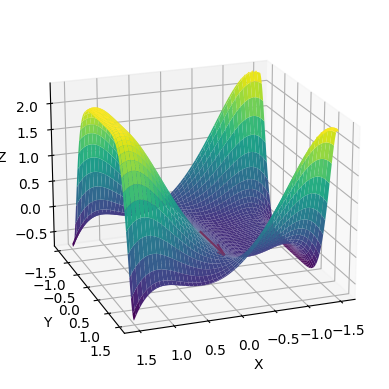

In [59]:
plot_surface_vectors_2(f2, [-1.5, 1.5], torch.tensor((-1.755471,  134.9867394)), torch.tensor((-16.41949,  1687.137228)))


#### Funcion *c*

tensor([6.4785e-04, 1.0000e+00])


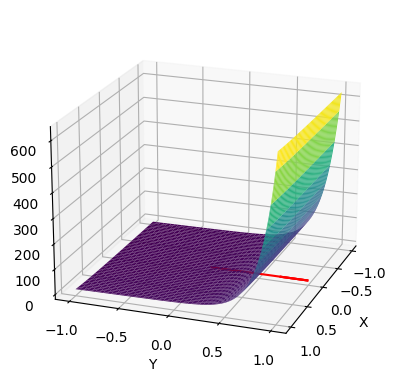

In [60]:
plot_surface_vectors_3(f3, [-1, 1], torch.tensor((2.0003, -31.9999)), torch.tensor((2.0271,  9.3681)))

### (3) calcule la magnitud de tal vec- tor gradiente en cada punto

#### Funcion a

In [61]:
p_1 = torch.tensor((6520.2732,  -5105.8224))
p_0 = torch.tensor((0,0,0))

print(p_0)
print(p_1)


if p_1.all():
  print(f"La magnitud del vector gradiente en P1 es {torch.norm(p_1)}")
else:
  print(f"La magnitud del vector gradiente en P1 es 0")
if p_0.all():
  print(f"La magnitud del vector gradiente en P0 es {torch.norm(p_0)}")
else:
  print(f"La magnitud del vector gradiente en P0 es 0")

tensor([0, 0, 0])
tensor([ 6520.2734, -5105.8223])
La magnitud del vector gradiente en P1 es 8281.5087890625
La magnitud del vector gradiente en P0 es 0


### Funcion b

In [62]:
p_1 = torch.tensor((-1.755471,  134.9867394))
p_0 = torch.tensor((-16.41949,  1687.137228))

print(p_0)
print(p_1)


if p_1.all():
  print(f"La magnitud del vector gradiente en P1 es {torch.norm(p_1)}")
else:
  print(f"La magnitud del vector gradiente en P1 es 0")
if p_0.all():
  print(f"La magnitud del vector gradiente en P0 es {torch.norm(p_0)}")
else:
  print(f"La magnitud del vector gradiente en P0 es 0")

tensor([ -16.4195, 1687.1372])
tensor([ -1.7555, 134.9867])
La magnitud del vector gradiente en P1 es 134.99815368652344
La magnitud del vector gradiente en P0 es 1687.217041015625


### Funcion c

In [64]:
p_1 = torch.tensor((2.0003, -31.9999))
p_0 = torch.tensor((2.0271,  9.3681))

print(p_0)
print(p_1)


if p_1.all():
  print(f"La magnitud del vector gradiente en P1 es {torch.norm(p_1, p=2)}")
else:
  print(f"La magnitud del vector gradiente en P1 es 0")
if p_0.all():
  print(f"La magnitud del vector gradiente en P0 es {torch.norm(p_0)}")
else:
  print(f"La magnitud del vector gradiente en P0 es 0")

tensor([2.0271, 9.3681])
tensor([  2.0003, -31.9999])
La magnitud del vector gradiente en P1 es 32.06235885620117
La magnitud del vector gradiente en P0 es 9.584906578063965
